# Exploratory Data Analysis (EDA)

In [59]:
import pandas as pd
df = pd.read_csv('train.csv')

In [60]:
print(df.shape)
print(df.dtypes)
df.head()

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [63]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

Initial analysis shows that we need to handle missing values and possibly transform skewed features like Fare.also see potential for engineered features such as FamilySize, IsAlone, and Title from Name. The target variable is imbalanced and may require techniques to address this during model training.

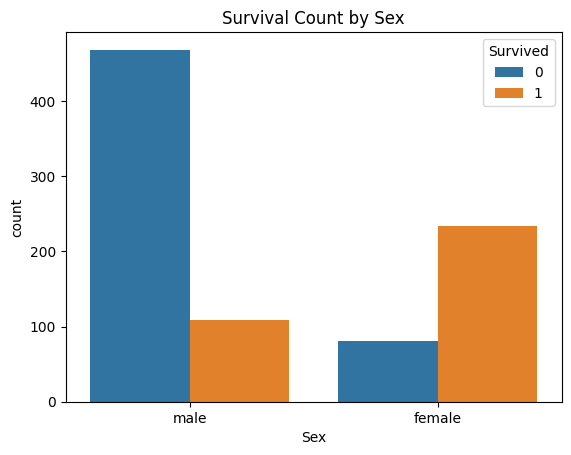

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

Survival by Sex
Observation: Females have a significantly higher survival rate than males.

Interpretation: This strongly supports the historical account that women were prioritized during rescue (“women and children first”).
Sex is clearly a strong predictor of survival

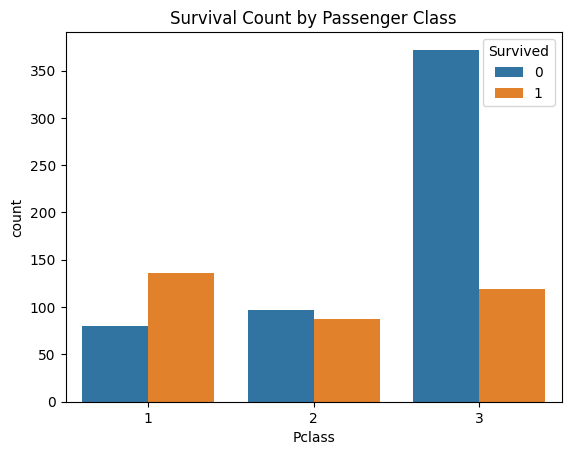

In [65]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

Survival by Passenger Class (Pclass)
Observation: Passengers in 1st class have the highest survival rates, while 3rd class passengers have the lowest.

Interpretation: Higher social/economic status increased the chance of survival.
Pclass is a key socio-economic indicator and should be retained as a feature.

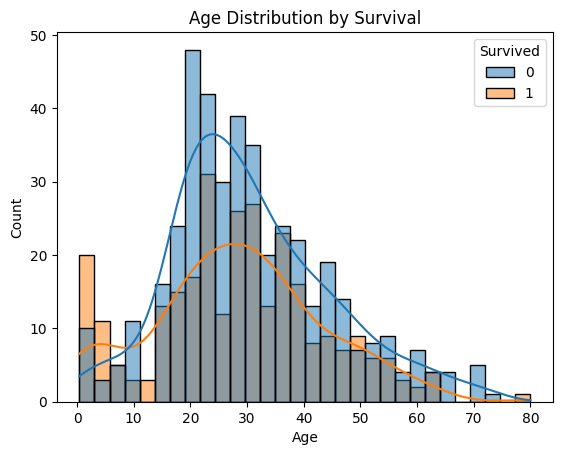

In [66]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

Age Distribution by Survival
Observation: Children (around 0–12 years old) show higher survival rates than adults.
Older adults (60+) have lower survival rates.

Interpretation: Age influences survival, with priority likely given to children.
This supports creating Age Groups as a categorical feature.

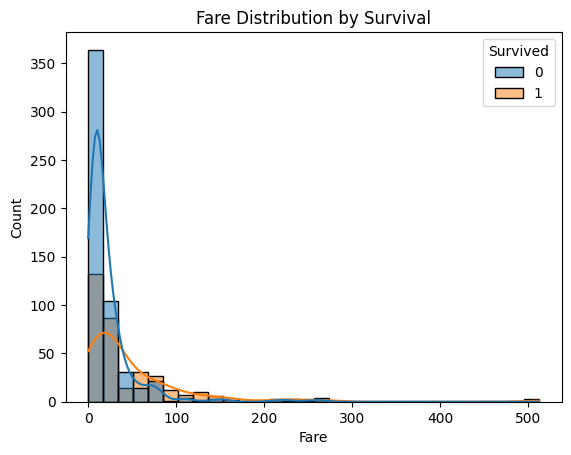

In [67]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title('Fare Distribution by Survival')
plt.show()

Fare Distribution by Survival
Observation: Higher fare values are associated with higher survival rates.
Many survivors are concentrated in the higher fare range.

Interpretation: Fare is a proxy for socio-economic status and aligns with the Pclass findings.
Fare may benefit from binning to reduce skewness.

Conclusion for Feature Engineering
Based on these patterns, the following transformations are justified:

Family-related features: FamilySize, IsAlone

Socio-economic indicators: Keep Pclass, create FareBin

Demographic indicators: Create AgeGroup, extract Title from Name

Cabin information: Extract first letter or mark as unknown

# Feature Engineering

To improve model performance and capture meaningful patterns in the Titanic dataset, several new features were created and existing ones were transformed.
The same preprocessing steps were applied to both the training and test datasets to ensure consistency.

1. Family-Based Features
FamilySize → Calculated as SibSp + Parch + 1 to represent the total number of people traveling together.

IsAlone → Binary feature (1 if traveling alone, 0 otherwise).
Passengers traveling alone may have different survival probabilities compared to those with family.

2. Passenger Titles
Title → Extracted from the passenger’s name (e.g., Mr, Mrs, Miss, Master, etc.).

Rare titles (appearing fewer than 10 times) were grouped into a single "Rare" category.
Titles can indicate social status, gender, or age group.

3. Cabin Location
CabinLetter → The first letter of the cabin number (e.g., C in C85), representing the deck location.

Missing values were filled with "Unknown".
Deck location might relate to accessibility to lifeboats.

4. Socioeconomic Indicators
FareBin → Passenger fares were divided into 4 quartile-based bins to reduce skewness and the effect of outliers.

This transformation groups passengers into low-, mid-, and high-fare categories.

5. Age Grouping
AgeGroup → Age was grouped into:

Child (0–12)

Teen (13–18)

YoungAdult (19–35)

Adult (36–60)

Senior (61+)

Age groups highlight survival patterns that differ across life stages.

6. Missing Value Handling
Age → Filled with median age.

Fare → Filled with median fare.

Embarked → Filled with most common port of embarkation.

CabinLetter → "Unknown" for missing cabin data.

7. Encoding
Sex → Label encoded (male=1, female=0).

AgeGroup → Ordinal encoded according to logical age progression.

Embarked, Title, CabinLetter → One-hot encoded to avoid imposing order.

These engineered features enrich the dataset by incorporating:

Social structure (family size, titles)

Economic indicators (fare bins, passenger class)

Demographics (sex, age group)

Ship location (cabin letter)

The transformations also address missing values and standardize categorical variables, ensuring the dataset is fully numeric and ready for model training.
